# (1) Data Understanding

In [2]:
import pandas as pd


In [3]:
#importing data
df = pd.read_csv('realtor-data.csv')

In [4]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
#checking data size
import numpy as np

df.shape

(923159, 12)

In [6]:
df.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [7]:
# Change from object to datetime
df['sold_date'] = pd.to_datetime(df['sold_date'])

In [8]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,922954.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,6590.061523,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3818.208203,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,2919.000000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,7004.000000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,10001.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


In [9]:
df.isnull().sum()

status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [10]:
# check the percentage of null rows by columns
null_cols = df.isnull().sum() / df.shape[0] * 100
print(null_cols)

status           0.000000
price            0.007691
bed             14.266556
bath            12.478024
acre_lot        29.639856
full_address     0.000000
street           0.231596
city             0.008016
state            0.000000
zip_code         0.022206
house_size      32.263456
sold_date       50.561496
dtype: float64


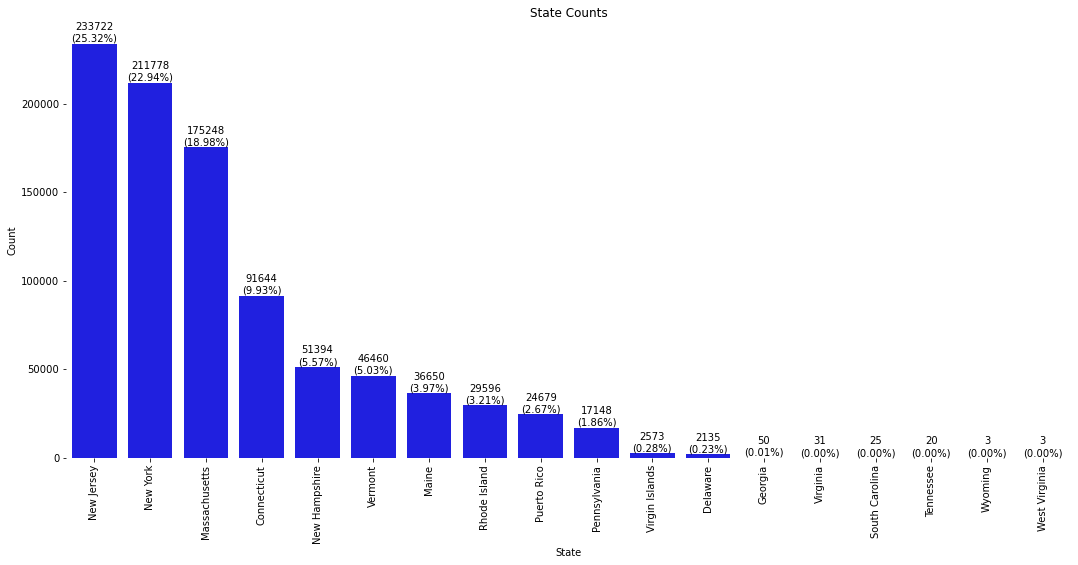

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the count of each state

state_counts = df['state'].value_counts()
total = len(df)

# create the count plot
plt.figure(figsize=(18,8))
ax = sns.countplot(x='state', data=df, order=state_counts.index, color="blue")

# add title and labels
plt.title("State Counts")
plt.xlabel("State")
plt.ylabel("Count")

# rotate x labels

plt.xticks(rotation=90)

# add labels with count and percentage of total for each state
for i, state in enumerate(ax.get_xticklabels()):
    count = state_counts[state.get_text()]
    percent = (count/total)*100
    ax.annotate('{}\n({:.2f}%)'.format(count, percent), (i, count), ha='center', va='bottom', fontsize=10)

# remove border line

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    
    
plt.show()

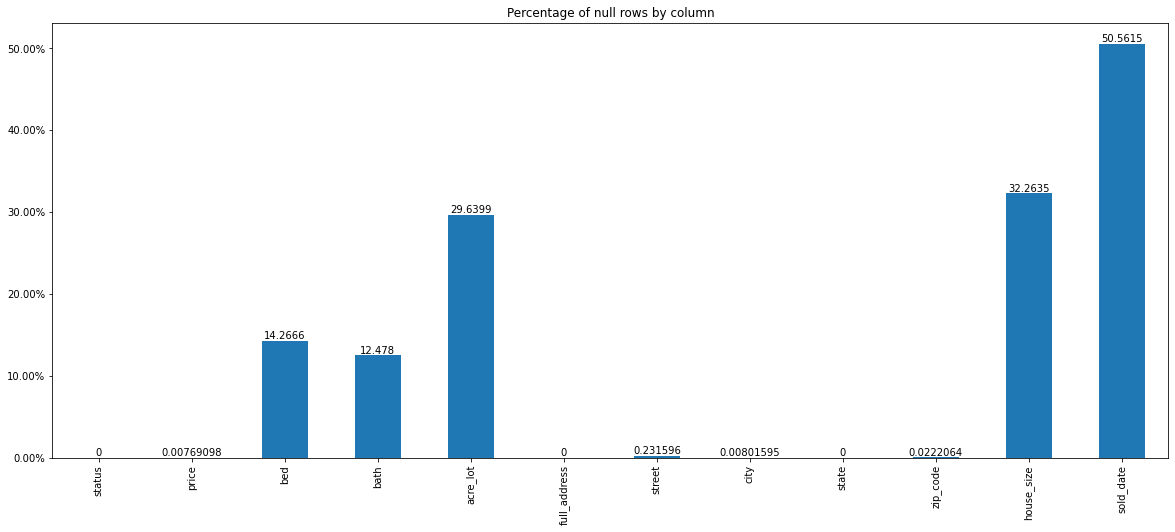

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# set the y-axis to display only two decimal places
ax = null_cols.plot.bar(figsize=(20,8), title='Percentage of null rows by column')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}%'.format(y)))

# add the labels with the percentage values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.show()

In [13]:
#iqr method price
# Calculate the first and third quartiles (25th and 75th percentiles) of the data
q1, q3 = np.percentile(df["price"], [25, 75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds for the data
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Identify the outliers in the data
outliers = [x for x in df["price"] if x < lower_bound or x > upper_bound]

len(outliers)

0

# (2) Data Preparation

In [14]:
#replace missing values with 0

df['price'].fillna(value=0, inplace=True)

In [15]:
df.isnull().sum()

status               0
price                0
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [16]:
#Create Datase only to not sold (sold_date = null)

df_notsold=df[df['sold_date'].isnull()]

# (3) Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Checking correlations
correlation = df_notsold.corr()

<AxesSubplot:>

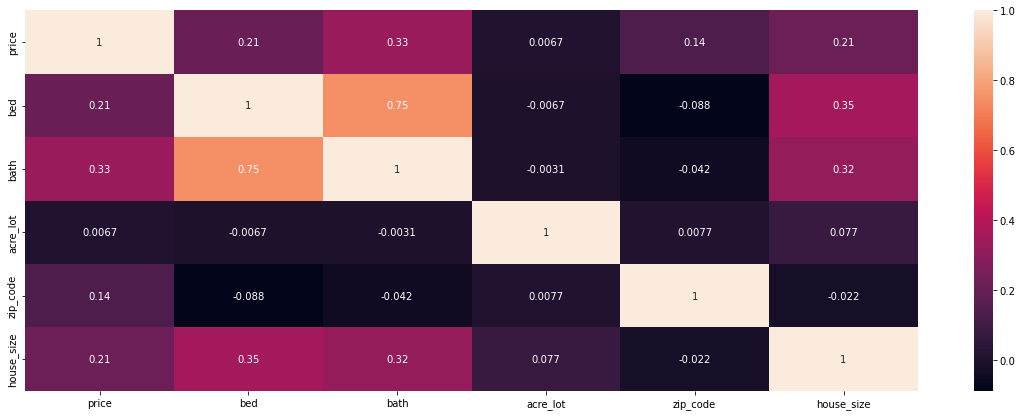

In [19]:
# correlation plot
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

In [20]:
dep_var = 'price'
indep_vars = ['zip_code','bed','bath','house_size']
correlation.loc[indep_vars, dep_var]

zip_code      0.136769
bed           0.205265
bath          0.328568
house_size    0.209654
Name: price, dtype: float64

In [21]:
# Checking correlation by state

# group data by state
grouped = df_notsold.groupby('state')

# calculate the correlation for each group
for name, group in grouped:
    print("Correlation for state:", name)
    print(group.drop('state', axis=1).corr())
    print("\n")

Correlation for state: Connecticut
               price       bed      bath  acre_lot  zip_code  house_size
price       1.000000  0.165329  0.376490  0.026120  0.142442    0.337613
bed         0.165329  1.000000  0.595462 -0.001738  0.009468    0.619554
bath        0.376490  0.595462  1.000000  0.005845  0.098730    0.810418
acre_lot    0.026120 -0.001738  0.005845  1.000000 -0.018531    0.681994
zip_code    0.142442  0.009468  0.098730 -0.018531  1.000000    0.072099
house_size  0.337613  0.619554  0.810418  0.681994  0.072099    1.000000


Correlation for state: Delaware
               price       bed      bath  acre_lot  zip_code  house_size
price       1.000000  0.513877  0.642297  0.272605 -0.114358    0.679882
bed         0.513877  1.000000  0.513073  0.276584 -0.047857    0.643216
bath        0.642297  0.513073  1.000000  0.298307 -0.133102    0.652844
acre_lot    0.272605  0.276584  0.298307  1.000000  0.108698    0.094055
zip_code   -0.114358 -0.047857 -0.133102  0.108698  1.0

Correlation heatmap for state: Connecticut


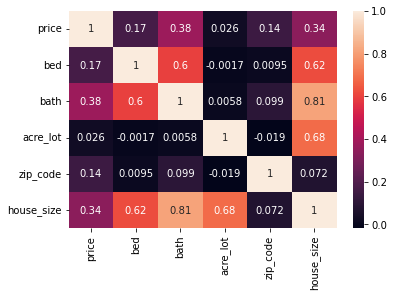

Correlation heatmap for state: Delaware


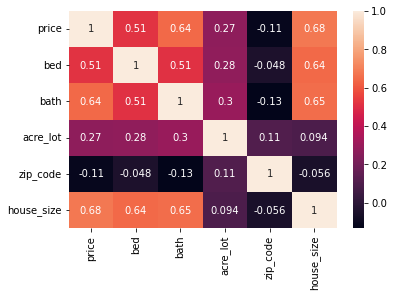

Correlation heatmap for state: Georgia


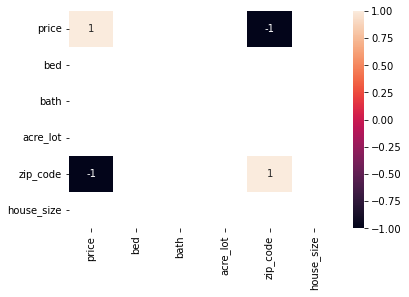

Correlation heatmap for state: Maine


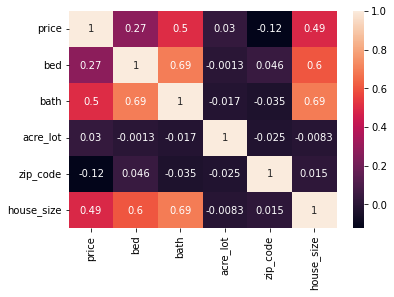

Correlation heatmap for state: Massachusetts


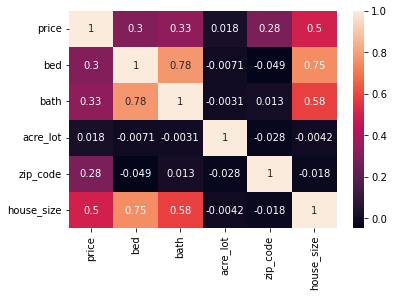

Correlation heatmap for state: New Hampshire


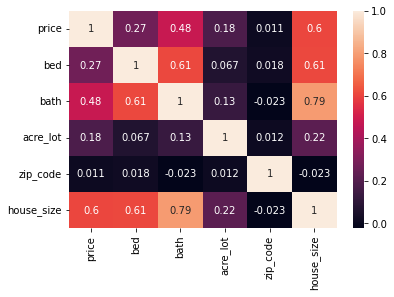

Correlation heatmap for state: New Jersey


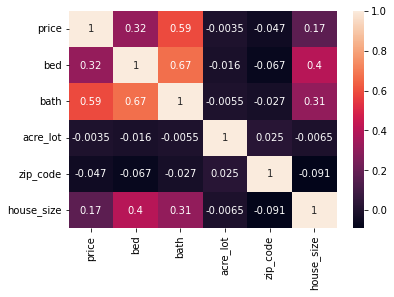

Correlation heatmap for state: New York


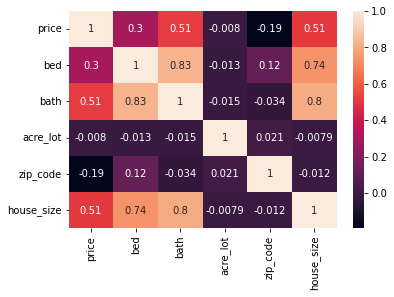

Correlation heatmap for state: Pennsylvania


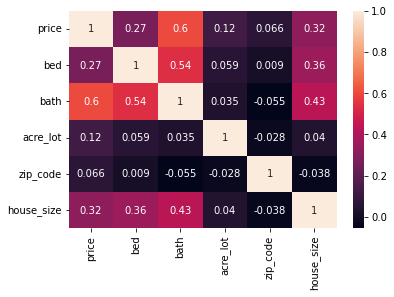

Correlation heatmap for state: Puerto Rico


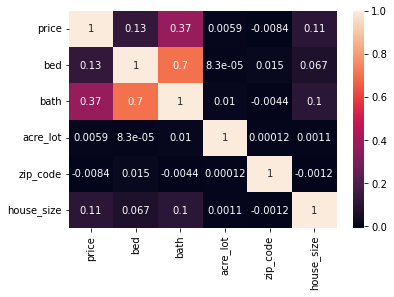

Correlation heatmap for state: Rhode Island


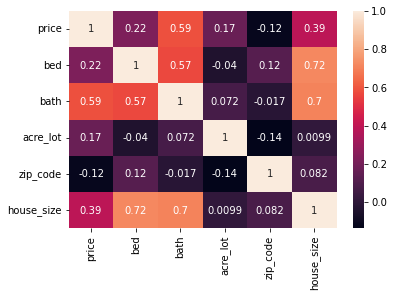

Correlation heatmap for state: South Carolina


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


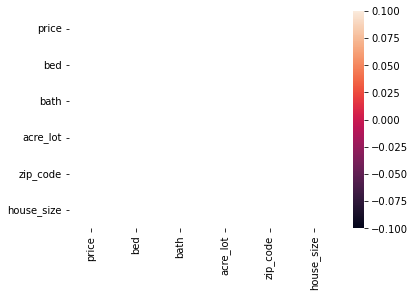

Correlation heatmap for state: Tennessee


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


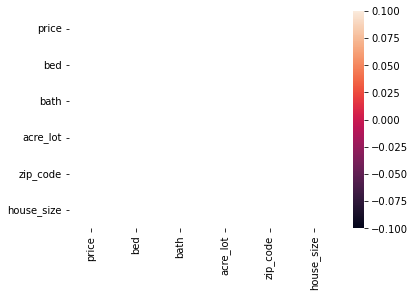

Correlation heatmap for state: Vermont


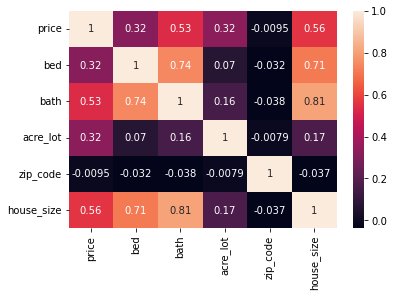

Correlation heatmap for state: Virgin Islands


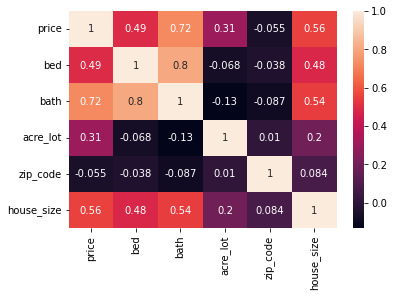

Correlation heatmap for state: Virginia


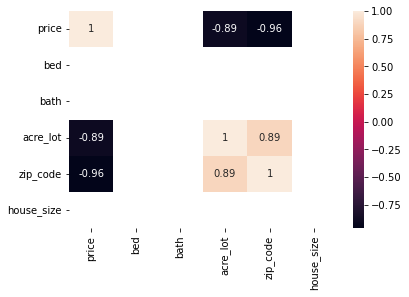

Correlation heatmap for state: West Virginia


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


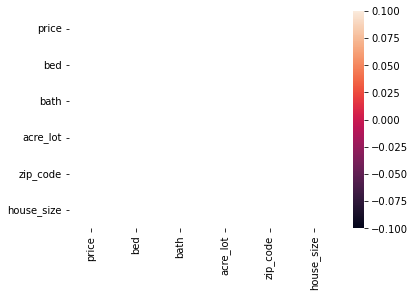

Correlation heatmap for state: Wyoming


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


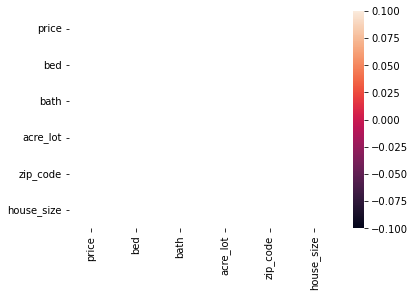

In [22]:
import seaborn as sns

# group data by state
grouped = df_notsold.groupby('state')

# calculate the correlation for each group and visualize it
for name, group in grouped:
    print("Correlation heatmap for state:", name)
    sns.heatmap(group.drop('state', axis=1).corr(),annot=True)
    plt.show()

# Modelling New York

In [23]:
#Create a datasaet for new york state
df_ny = df_notsold.loc[df['state'] == 'New York']

In [24]:
df_ny.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.298000e+04,81293.000000,88583.000000,29328.000000,92972.000000,59639.000000
mean,2.120762e+06,2.981843,2.434824,28.372913,10714.031924,1987.826741
std,4.106192e+06,2.626093,2.126015,1436.173953,963.347769,2159.012986
min,0.000000e+00,1.000000,1.000000,0.010000,10001.000000,122.000000
25%,4.500000e+05,1.000000,1.000000,0.050000,10024.000000,881.000000
50%,8.990000e+05,2.000000,2.000000,0.090000,10533.000000,1364.000000
75%,2.110000e+06,4.000000,3.000000,0.460000,11231.000000,2400.000000
max,1.690000e+08,68.000000,46.000000,100000.000000,99999.000000,112714.000000


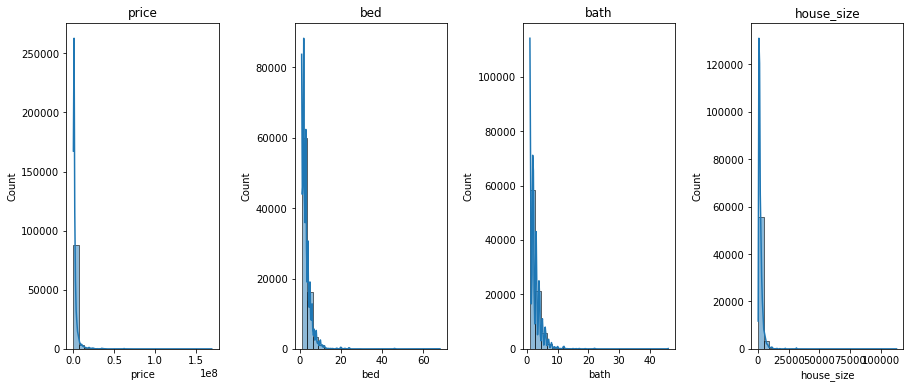

In [25]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','house_size']:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [26]:
#Checking Qty of Apartments bigger then 5 bed

x= len(df_ny)

y = df_ny[df_ny["bed"]>5].shape[0]

z= y/x

print(x)
print(y)
print(z)


92980
8550
0.09195525919552593


In [27]:
#Checking Qty of Apartments bigger then 3000 fet

x= len(df_ny)

y = df_ny[df_ny["house_size"]>3000].shape[0]

z= y/x

print(x)
print(y)
print(z)


92980
9908
0.10656055065605506


In [28]:
#Remove Values bed > 5
df_ny= df_ny[df_ny["bed"]<6]


In [29]:
#Checking Qty (%) of Apartments < 6 beds and > 3000 fet

x= len(df_ny)

y = df_ny[df_ny["house_size"]>3000].shape[0]

z= y/x

print(x)
print(y)
print(z)


72743
4710
0.06474849813727782


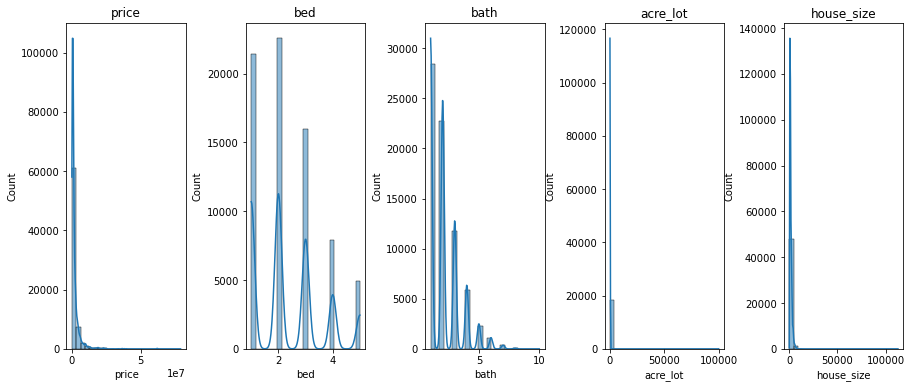

In [30]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','acre_lot','house_size']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [31]:
#Remove Values house_size > 2000
df_ny= df_ny[df_ny["house_size"]<3000]

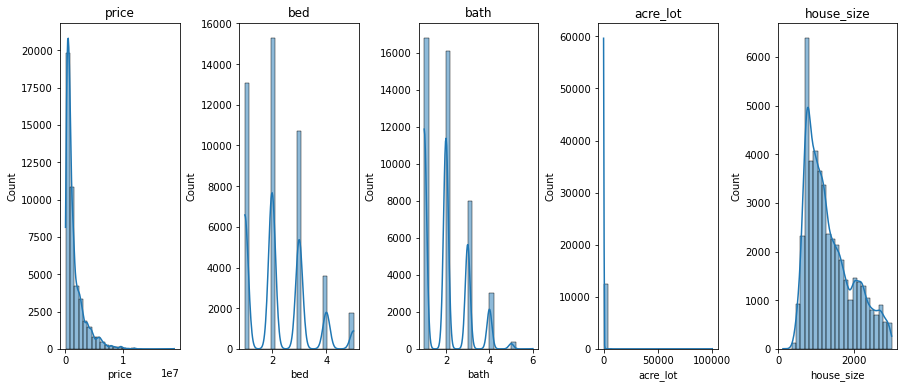

In [32]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','acre_lot','house_size']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [33]:
df_ny.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
30149,for_sale,175000.0,3.0,1.0,60.00,"187 Bly Hollow Rd, Berlin, NY, 12022",187 Bly Hollow Rd,Berlin,New York,12022.0,1176.0,NaT
54259,for_sale,419000.0,3.0,3.0,1.90,"1315 Lake View Rd, Copake, NY, 12516",1315 Lake View Rd,Copake,New York,12516.0,1800.0,NaT
54262,for_sale,365000.0,3.0,2.0,2.00,"105-111 Breezy Hl, Copake, NY, 12517",105-111 Breezy Hl,Copake,New York,12517.0,1482.0,NaT
54285,for_sale,365000.0,5.0,4.0,2.00,"105-111 Breezy Hl, Copake, NY, 12517",105-111 Breezy Hl,Copake,New York,12517.0,1482.0,NaT
54528,for_sale,194900.0,4.0,3.0,1.29,"582 Dunham Hollow Rd, Nassau, NY, 12123",582 Dunham Hollow Rd,Nassau,New York,12123.0,2274.0,NaT


# Modelling New York 

<AxesSubplot:>

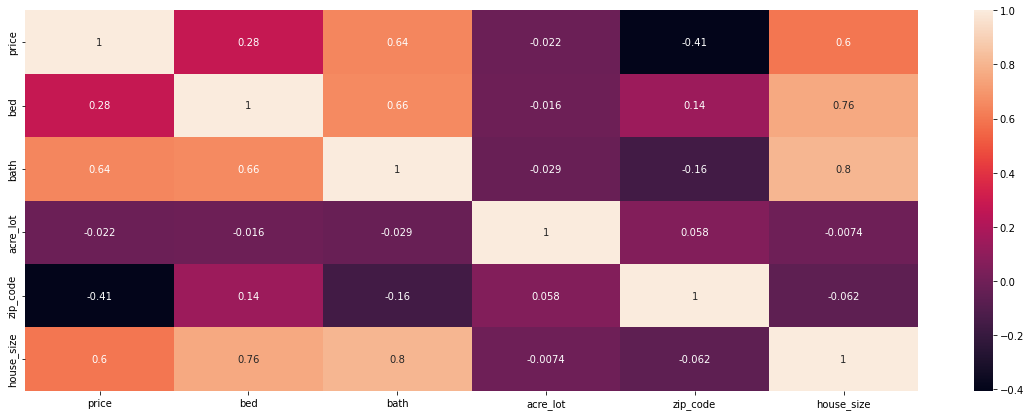

In [34]:
# Checking correlations
correlation = df_ny.corr()

# correlation plot
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

In [35]:
#Understand Linear Regression about House_Size vs House_Price

import numpy as np

from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X = np.array(df_ny['house_size']).reshape(-1, 1)

y = np.array(df_ny['price']).reshape(-1, 1)

# Separating the data into independent and dependent variables

# Converting each dataframe into a numpy array 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

regr.score(X_train, y_train)


0.360159818086089

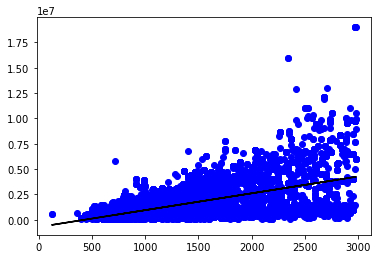

In [36]:
# Plot Linear Rregression

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values

# Modelling New York - (detail by city)


In [37]:
#Print of house with prices

city_agg = df_ny.groupby("city").agg({
    'price':'count'
})

print(city_agg.sort_values(by=city_agg.columns[0], ascending=False))

               price
city                
New York City  11551
New York        9394
Brooklyn        5323
Bronx           2462
Staten Island   1788
...              ...
Bethel             1
Flatlands          1
Valatie            1
Malverne           1
East Setauket      1

[324 rows x 1 columns]


In [38]:
df_ny.loc[df['city'] == "New York City", 'city'] = "New York"

In [39]:
#Print of house with prices

city_agg = df_ny.groupby("city").agg({
    'price':'count'
})

print(city_agg.sort_values(by=city_agg.columns[0], ascending=False))

                price
city                 
New York        20945
Brooklyn         5323
Bronx            2462
Staten Island    1788
Yonkers          1583
...               ...
Montebello          1
Verbank             1
Walden              1
East Greenbush      1
Miller Place        1

[323 rows x 1 columns]


In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create a boolean mask to filter the DataFrame to only include rows where the "city" column is equal to "New York City"

mask = df_ny['city'] == "New York"

# Use the boolean mask to filter the DataFrame
df_ny= df_ny[mask]

#Converting each dataframe into a numpy array 
X = np.array(df_ny['house_size']).reshape(-1, 1)
y = np.array(df_ny['price']).reshape(-1, 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Creating Linear Regression Model

regr = linear_model.LinearRegression()

# Fitting the data into the model

regr.fit(X_train, y_train)

#Marke predictions using the testing set

y_pred=regr.predict(X_test)

#The mean squared error
print('Mean Squared error: %.2f' % mean_squared_error(y_test, y_pred))

#The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Getting the score of the model
regr.score(X_train, y_train)

Mean Squared error: 1460182540562.66
Coefficient of determination: 0.60


0.6075417628653025

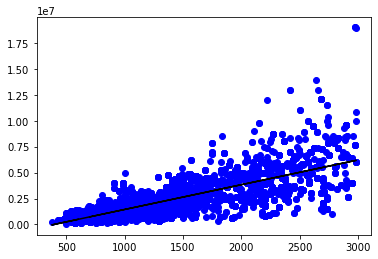

In [41]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values

In [42]:
df_ny.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465074,for_sale,3600000.0,3.0,3.0,NaN,"350 E 81st St Apt 3, New York City, NY, 10028",350 E 81st St Apt 3,New York,New York,10028.0,2338.0,NaT
465103,for_sale,1775000.0,2.0,2.0,NaN,"303 W 29th St Apt A, New York City, NY, 10001",303 W 29th St Apt A,New York,New York,10001.0,1200.0,NaT
465513,for_sale,895000.0,2.0,2.0,NaN,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaT
465524,for_sale,526000.0,2.0,1.0,NaN,"105 Bennett Ave Unit 44B, New York City, NY, 1...",105 Bennett Ave Unit 44B,New York,New York,10033.0,741.0,NaT
465538,for_sale,1295000.0,1.0,1.0,NaN,"47-49 King St Unit 8, New York City, NY, 10014",47-49 King St Unit 8,New York,New York,10014.0,775.0,NaT


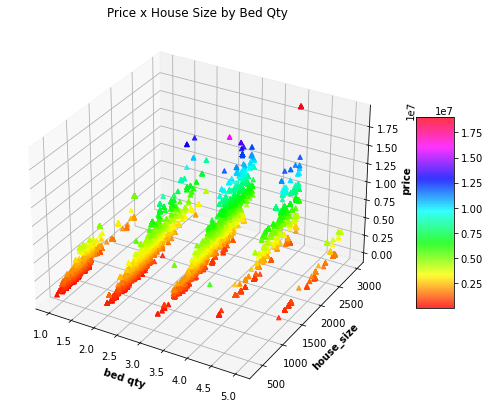

In [43]:
# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = df_ny.iloc[:,1]
x = df_ny.iloc[:,2]
y = df_ny.iloc[:,10]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Price x House Size by Bed Qty")

ax.set_xlabel('bed qty', fontweight ='bold')
ax.set_ylabel('house_size', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

 
# show plot
plt.show()

# Importing data from neighborhood


In [44]:
!pip install tabula-py

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import tabula
import pandas as pd

# Read the PDF file into a dataframe
pdf = tabula.read_pdf("Zip_Code.pdf", pages='all')[0]

pdf.head(100)

,Bronx,Unnamed: 0
0,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468"
2,High Bridge and Morrisania,"10451, 10452, 10456"
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Kingsbridge and Riverdale,"10463, 10471"
5,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,NaN
8,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
9,Southwest Brooklyn,"11209, 11214, 11228"


In [46]:
# change name of column dataset

pdf = pdf.rename(columns={'Bronx':"Neighborhood"})
pdf = pdf.rename(columns={'Unnamed: 0':'Zip Code'})

# Drop rows with NA
pdf = pdf.dropna()

In [47]:
pdf.head(100)

,Neighborhood,Zip Code
0,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468"
2,High Bridge and Morrisania,"10451, 10452, 10456"
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Kingsbridge and Riverdale,"10463, 10471"
5,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
8,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
9,Southwest Brooklyn,"11209, 11214, 11228"
10,Borough Park,"11204, 11218, 11219, 11230"


In [48]:
# Split the zip codes and create a new DataFrame with one column for each zip code
df_zip_codes = pdf['Zip Code'].str.split(',', expand=True)

#df_zip_codes = df_zip_codes.astype(int)

pdf = pd.concat([pdf, df_zip_codes], axis=1)

# Rename the columns
pdf = pdf.rename(columns={0: 'Zip Code 1', 1: 'Zip Code 2', 2: 'Zip Code 3', 3: 'Zip Code 4', 4: 'Zip Code 5', 
                        5: 'Zip Code 6',6: 'Zip Code 7',7: 'Zip Code 8',8: 'Zip Code 9'})

# Drop the original Zip Code column
pdf = pdf.drop(['Zip Code'], axis=1)


In [49]:
pdf.head(100)

,Neighborhood,Zip Code 1,Zip Code 2,Zip Code 3,Zip Code 4,Zip Code 5,Zip Code 6,Zip Code 7,Zip Code 8,Zip Code 9
0,Central Bronx,10453,10457,10460,None,None,None,None,None,None
1,Bronx Park and Fordham,10458,10467,10468,None,None,None,None,None,None
2,High Bridge and Morrisania,10451,10452,10456,None,None,None,None,None,None
3,Hunts Point and Mott Haven,10454,10455,10459,10474,None,None,None,None,None
4,Kingsbridge and Riverdale,10463,10471,None,None,None,None,None,None,None
5,Northeast Bronx,10466,10469,10470,10475,None,None,None,None,None
6,Southeast Bronx,10461,10462,10464,10465,10472,10473,None,None,None
8,Central Brooklyn,11212,11213,11216,11233,11238,None,None,None,None
9,Southwest Brooklyn,11209,11214,11228,None,None,None,None,None,None
10,Borough Park,11204,11218,11219,11230,None,None,None,None,None


In [50]:
pdf.dtypes

Neighborhood    object
Zip Code 1      object
Zip Code 2      object
Zip Code 3      object
Zip Code 4      object
Zip Code 5      object
Zip Code 6      object
Zip Code 7      object
Zip Code 8      object
Zip Code 9      object
dtype: object

In [51]:
pdf = pdf.astype({'Neighborhood':'string','Zip Code 1':'float'})

In [52]:
pdf.dtypes

Neighborhood     string
Zip Code 1      float64
Zip Code 2       object
Zip Code 3       object
Zip Code 4       object
Zip Code 5       object
Zip Code 6       object
Zip Code 7       object
Zip Code 8       object
Zip Code 9       object
dtype: object

# Merge data (city vs Neighborhood)


In [53]:
df_ny.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465074,for_sale,3600000.0,3.0,3.0,NaN,"350 E 81st St Apt 3, New York City, NY, 10028",350 E 81st St Apt 3,New York,New York,10028.0,2338.0,NaT
465103,for_sale,1775000.0,2.0,2.0,NaN,"303 W 29th St Apt A, New York City, NY, 10001",303 W 29th St Apt A,New York,New York,10001.0,1200.0,NaT
465513,for_sale,895000.0,2.0,2.0,NaN,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaT
465524,for_sale,526000.0,2.0,1.0,NaN,"105 Bennett Ave Unit 44B, New York City, NY, 1...",105 Bennett Ave Unit 44B,New York,New York,10033.0,741.0,NaT
465538,for_sale,1295000.0,1.0,1.0,NaN,"47-49 King St Unit 8, New York City, NY, 10014",47-49 King St Unit 8,New York,New York,10014.0,775.0,NaT


In [54]:
pdf.head()

,Neighborhood,Zip Code 1,Zip Code 2,Zip Code 3,Zip Code 4,Zip Code 5,Zip Code 6,Zip Code 7,Zip Code 8,Zip Code 9
0,Central Bronx,10453.0,10457,10460,None,None,None,None,None,None
1,Bronx Park and Fordham,10458.0,10467,10468,None,None,None,None,None,None
2,High Bridge and Morrisania,10451.0,10452,10456,None,None,None,None,None,None
3,Hunts Point and Mott Haven,10454.0,10455,10459,10474,None,None,None,None,None
4,Kingsbridge and Riverdale,10463.0,10471,None,None,None,None,None,None,None


In [55]:
df_ny=pd.merge(df_ny, pdf, left_on='zip_code',right_on='Zip Code 1')

In [56]:
df_ny.head(100)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,...,Neighborhood,Zip Code 1,Zip Code 2,Zip Code 3,Zip Code 4,Zip Code 5,Zip Code 6,Zip Code 7,Zip Code 8,Zip Code 9
0,for_sale,1775000.0,2.0,2.0,NaN,"303 W 29th St Apt A, New York City, NY, 10001",303 W 29th St Apt A,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
1,for_sale,7995000.0,3.0,4.0,NaN,"35 Hudson Yards Unit 5304, New York, NY, 10001",35 Hudson Yards Unit 5304,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
2,for_sale,6950000.0,3.0,4.0,NaN,"35 Hudson Yards Unit 6603, New York, NY, 10001",35 Hudson Yards Unit 6603,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
3,for_sale,6650000.0,3.0,3.0,NaN,"515 W 29th St Apt 7N, New York City, NY, 10001",515 W 29th St Apt 7N,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
4,for_sale,1625000.0,1.0,2.0,NaN,"50 W 30th St Apt 4C, New York City, NY, 10001",50 W 30th St Apt 4C,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,for_sale,3950000.0,2.0,3.0,NaN,"15 Hudson Yards Unit 35D, New York, NY, 10001",15 Hudson Yards Unit 35D,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
96,for_sale,2200000.0,2.0,3.0,NaN,"215 W 28th St Apt 4C, New York City, NY, 10001",215 W 28th St Apt 4C,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
97,for_sale,2300000.0,2.0,3.0,NaN,"215 W 28th St Apt 5D, New York City, NY, 10001",215 W 28th St Apt 5D,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None
98,for_sale,2525000.0,2.0,3.0,NaN,"215 W 28th St Apt 7D, New York City, NY, 10001",215 W 28th St Apt 7D,New York,New York,10001.0,...,Chelsea and Clinton,10001.0,10011,10018,10019,10020,10036,None,None,None


In [57]:
df_ny.isnull().sum()

status             0
price              0
bed                0
bath               6
acre_lot        5409
full_address       0
street           108
city               0
state              0
zip_code           0
house_size         0
sold_date       6557
Neighborhood       0
Zip Code 1         0
Zip Code 2        16
Zip Code 3       602
Zip Code 4      2455
Zip Code 5      3297
Zip Code 6      5353
Zip Code 7      6540
Zip Code 8      6557
Zip Code 9      6557
dtype: int64

In [58]:
# Dictionary of Column name with associated index.
idx_dic = {}
for col in df.columns:
    idx_dic[col] = df_ny.columns.get_loc(col)
print(idx_dic)

{'status': 0, 'price': 1, 'bed': 2, 'bath': 3, 'acre_lot': 4, 'full_address': 5, 'street': 6, 'city': 7, 'state': 8, 'zip_code': 9, 'house_size': 10, 'sold_date': 11}


In [59]:
#Drop Columns Zip Code

df_ny.drop(df_ny.iloc[:, 13:19], inplace=True, axis=1)

In [60]:
df_ny.head(100)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,Neighborhood,Zip Code 7,Zip Code 8,Zip Code 9
0,for_sale,1775000.0,2.0,2.0,NaN,"303 W 29th St Apt A, New York City, NY, 10001",303 W 29th St Apt A,New York,New York,10001.0,1200.0,NaT,Chelsea and Clinton,None,None,None
1,for_sale,7995000.0,3.0,4.0,NaN,"35 Hudson Yards Unit 5304, New York, NY, 10001",35 Hudson Yards Unit 5304,New York,New York,10001.0,2652.0,NaT,Chelsea and Clinton,None,None,None
2,for_sale,6950000.0,3.0,4.0,NaN,"35 Hudson Yards Unit 6603, New York, NY, 10001",35 Hudson Yards Unit 6603,New York,New York,10001.0,2724.0,NaT,Chelsea and Clinton,None,None,None
3,for_sale,6650000.0,3.0,3.0,NaN,"515 W 29th St Apt 7N, New York City, NY, 10001",515 W 29th St Apt 7N,New York,New York,10001.0,2326.0,NaT,Chelsea and Clinton,None,None,None
4,for_sale,1625000.0,1.0,2.0,NaN,"50 W 30th St Apt 4C, New York City, NY, 10001",50 W 30th St Apt 4C,New York,New York,10001.0,813.0,NaT,Chelsea and Clinton,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,for_sale,3950000.0,2.0,3.0,NaN,"15 Hudson Yards Unit 35D, New York, NY, 10001",15 Hudson Yards Unit 35D,New York,New York,10001.0,1563.0,NaT,Chelsea and Clinton,None,None,None
96,for_sale,2200000.0,2.0,3.0,NaN,"215 W 28th St Apt 4C, New York City, NY, 10001",215 W 28th St Apt 4C,New York,New York,10001.0,1136.0,NaT,Chelsea and Clinton,None,None,None
97,for_sale,2300000.0,2.0,3.0,NaN,"215 W 28th St Apt 5D, New York City, NY, 10001",215 W 28th St Apt 5D,New York,New York,10001.0,1118.0,NaT,Chelsea and Clinton,None,None,None
98,for_sale,2525000.0,2.0,3.0,NaN,"215 W 28th St Apt 7D, New York City, NY, 10001",215 W 28th St Apt 7D,New York,New York,10001.0,1118.0,NaT,Chelsea and Clinton,None,None,None


In [61]:
# from feet to m^2

df_ny['house_size'] = df_ny['house_size'] * 0.304

In [62]:
#Print of house with prices

Neighborhood_agg = df_ny.groupby("Neighborhood").agg({
    'price':'mean',
    'house_size':'mean',   
})

Neighborhood_agg['price_m2']= Neighborhood_agg['price']/Neighborhood_agg['house_size']

Neighborhood_agg['price'] = Neighborhood_agg['price'] / 1000

Neighborhood_agg['price'] = Neighborhood_agg['price'].apply('${:,.2f}K'.format)

Neighborhood_agg['house_size'] = Neighborhood_agg['house_size'].apply('{:,.2f}m^2'.format)

Neighborhood_agg.sort_values(by=['price_m2'], inplace=True)

print(Neighborhood_agg)

                                    price house_size     price_m2
Neighborhood                                                     
Canarsie and Flatlands           $305.00K  364.80m^2   836.074561
Bronx Park and Fordham           $608.48K  569.41m^2  1068.620803
South Shore                      $587.00K  465.12m^2  1262.039904
Stapleton and St. George         $707.08K  531.30m^2  1330.846924
Jamaica                          $670.00K  479.10m^2  1398.443762
Kingsbridge and Riverdale        $495.14K  319.23m^2  1551.047489
West Central Queens              $590.10K  378.95m^2  1557.199534
Mid-Island                       $949.00K  598.73m^2  1585.026089
North Queens                   $1,100.00K  689.47m^2  1595.423745
Borough Park                   $1,466.85K  772.68m^2  1898.385732
Inwood and Washington Heights    $565.56K  265.58m^2  2129.483752
East New York and New Lots       $742.98K  307.53m^2  2415.955588
Southern Brooklyn                $898.33K  348.08m^2  2580.824332
Southwest 

In [63]:
Neighborhood_agg.dtypes

price          object
house_size     object
price_m2      float64
dtype: object

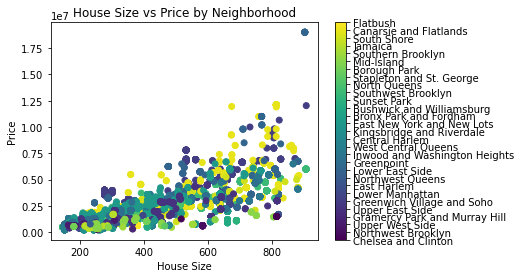

In [64]:
# Create a scatter plot
plt.scatter(df_ny['house_size'], df_ny['price'], c=df_ny['Neighborhood'].astype('category').cat.codes, cmap='viridis')

# Add a color bar for the neighborhoods
cbar = plt.colorbar()
cbar.set_ticks(range(len(df_ny['Neighborhood'].unique())))
cbar.set_ticklabels(df_ny['Neighborhood'].unique())

# Add axis labels and title
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("House Size vs Price by Neighborhood")

# Show the plot
plt.show()

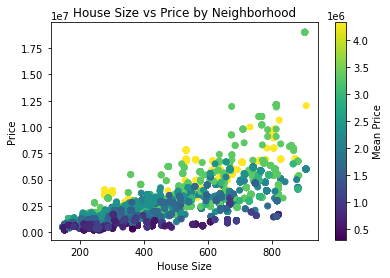

In [65]:
# Calculate the mean price for each neighborhood
mean_price = df_ny.groupby('Neighborhood')['price'].mean().sort_values()

# Create a scatter plot
plt.scatter(df_ny['house_size'], df_ny['price'], c=df_ny['Neighborhood'].map(mean_price), cmap='viridis')

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Mean Price")

# Add axis labels and title
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("House Size vs Price by Neighborhood")

# Show the plot
plt.show()

# Modelling New York 

In [66]:
df_ny_test= df_ny[df_ny["Neighborhood"]=="Lower Manhattan"]

In [67]:
df_ny_test.head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,Neighborhood,Zip Code 7,Zip Code 8,Zip Code 9
3906,for_sale,1900000.0,2.0,3.0,NaN,"30 West St Apt 10B, New York City, NY, 10004",30 West St Apt 10B,New York,New York,10004.0,426.816,NaT,Lower Manhattan,None,None,None
3907,for_sale,1735000.0,2.0,2.0,NaN,"25 Broad St Ph 1K, New York, NY, 10004",25 Broad St Ph 1K,New York,New York,10004.0,405.232,NaT,Lower Manhattan,None,None,None
3908,for_sale,3650000.0,3.0,4.0,NaN,"30 West St Apt 16F, New York City, NY, 10004",30 West St Apt 16F,New York,New York,10004.0,638.400,NaT,Lower Manhattan,None,None,None
3909,for_sale,2750000.0,2.0,3.0,NaN,"30 West St Apt 32E, New York City, NY, 10004",30 West St Apt 32E,New York,New York,10004.0,463.904,NaT,Lower Manhattan,None,None,None
3910,for_sale,1175000.0,1.0,2.0,NaN,"40 Broad St Ph 3B, New York, NY, 10004",40 Broad St Ph 3B,New York,New York,10004.0,293.056,NaT,Lower Manhattan,None,None,None
3911,for_sale,950000.0,1.0,1.0,NaN,"25 Broad St Apt 12N, New York City, NY, 10004",25 Broad St Apt 12N,New York,New York,10004.0,237.120,NaT,Lower Manhattan,None,None,None
3912,for_sale,930000.0,1.0,2.0,NaN,"25 Broad St Apt 12R, New York City, NY, 10004",25 Broad St Apt 12R,New York,New York,10004.0,243.200,NaT,Lower Manhattan,None,None,None
3913,for_sale,1395000.0,2.0,2.0,NaN,"25 Broad St Apt 18K, New York City, NY, 10004",25 Broad St Apt 18K,New York,New York,10004.0,340.784,NaT,Lower Manhattan,None,None,None
3914,for_sale,1595000.0,2.0,2.0,NaN,"25 Broad St Apt 20E, New York City, NY, 10004",25 Broad St Apt 20E,New York,New York,10004.0,371.792,NaT,Lower Manhattan,None,None,None
3915,for_sale,1625000.0,2.0,2.0,NaN,"25 Broad St Apt 15F, New York City, NY, 10004",25 Broad St Apt 15F,New York,New York,10004.0,424.080,NaT,Lower Manhattan,None,None,None


In [68]:
#Converting each dataframe into a numpy array 
X = np.array(df_ny_test['house_size']).reshape(-1, 1)
y = np.array(df_ny_test['price']).reshape(-1, 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Creating Linear Regression Model

regr = linear_model.LinearRegression()

# Fitting the data into the model

regr.fit(X_train, y_train)

#Marke predictions using the testing set

y_pred=regr.predict(X_test)

#The mean squared error
print('Mean Squared error: %.2f' % mean_squared_error(y_test, y_pred))

#The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Getting the score of the model
regr.score(X_train, y_train)

Mean Squared error: 148185935678.79
Coefficient of determination: 0.86


0.9244080715704088

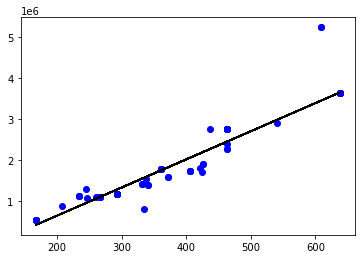

In [69]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values

# Multiple Linear Regression - Modelling 1-5 beds



In [70]:
#Converting each dataframe into a numpy array 
X = df_ny_test[['house_size','bed']]
y = df_ny_test['price']

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#Fitting the Multiple Linear Regression model

mlr = LinearRegression()  
mlr.fit(X_train, y_train)

#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

print("Score:", mlr.score(X_train, y_train))

Intercept:  -792384.6342602305
Coefficients:
Score: 0.9102444353337048


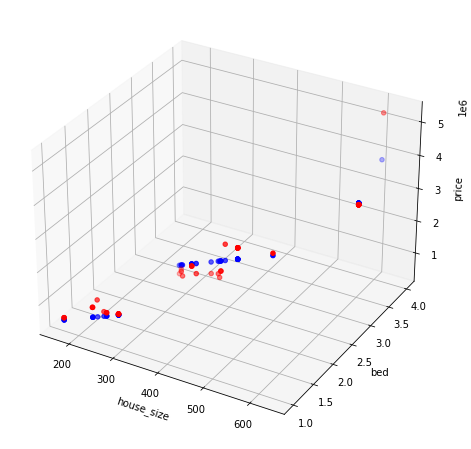

In [71]:
Y_predict = mlr.predict(X_test)


fig = plt.figure(figsize=(10, 8)) 

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['house_size'],X_test['bed'],y_test,c='r',marker='o')

ax.scatter(X_test['house_size'],X_test['bed'],Y_predict,c='b',marker='o')

ax.set_xlabel('house_size')
ax.set_ylabel('bed')
ax.set_zlabel('price')


plt.show()

# Data scatter of predicted values

# Multiple Linear Regression - Modelling 1-5 beds (too all cities)


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get a list of all unique neighborhoods in the dataset
neighborhoods = df_ny["Neighborhood"].unique()

# Create an empty dictionary to store the scores for each neighborhood
neighborhood_scores = {}

# Iterate over each neighborhood
for neighborhood in neighborhoods:
    # Get the subset of data for the current neighborhood
    df_ny_test = df_ny[df_ny["Neighborhood"] == neighborhood]
    
    # Convert the dataframe to a numpy array
    X = df_ny_test[['house_size','bed']]
    y = df_ny_test['price']

    # Split the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Fit the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X_train, y_train)
    
    # Store the score for the current neighborhood in the dictionary
    neighborhood_scores[neighborhood] = mlr.score(X_train, y_train)

# Print the scores for each neighborhood
for neighborhood, score in neighborhood_scores.items():
    print(neighborhood, "score:", score)

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get a list of all unique neighborhoods in the dataset
neighborhoods = df_ny["Neighborhood"].unique()

# Create an empty dictionary to store the scores for each neighborhood
neighborhood_scores = {}

# Iterate over each neighborhood
for neighborhood in neighborhoods:
    # Get the subset of data for the current neighborhood
    df_ny_test = df_ny[df_ny["Neighborhood"] == neighborhood]
    
    # Convert the dataframe to a numpy array
    X = df_ny_test[['house_size','bed']]
    y = df_ny_test['price']

    # Split the data into training and testing data
    if len(df_ny_test) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=1, random_state=0)

    # Fit the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X_train, y_train)
    
    # Store the score for the current neighborhood in the dictionary
    neighborhood_scores[neighborhood] = mlr.score(X_train, y_train)

# Print the scores for each neighborhood
for neighborhood, score in neighborhood_scores.items():
    print(neighborhood, "score:", score)

ValueError: train_size=1 should be either positive and smaller than the number of samples 1 or a float in the (0, 1) range

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get a list of all unique neighborhoods in the dataset
neighborhoods = df_ny["Neighborhood"].unique()

# Create an empty dictionary to store the scores for each neighborhood
neighborhood_scores = {}

# Iterate over each neighborhood
for neighborhood in neighborhoods:
    # Get the subset of data for the current neighborhood
    df_ny_test = df_ny[df_ny["Neighborhood"] == neighborhood]
    
    # Convert the dataframe to a numpy array
    X = df_ny_test[['house_size','bed']]
    y = df_ny_test['price']

    # Split the data into training and testing data
    if len(df_ny_test) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y

    # Fit the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X_train, y_train)
    
    # Store the score for the current neighborhood in the dictionary
    neighborhood_scores[neighborhood] = mlr.score(X_train, y_train)

# Print the scores for each neighborhood
for neighborhood, score in neighborhood_scores.items():
    print(neighborhood, "score:", score)

Chelsea and Clinton score: 0.3795272152577508
Northwest Brooklyn score: 0.872161289970335
Upper West Side score: 0.6341137051153993
Gramercy Park and Murray Hill score: 0.5568085608130887
Upper East Side score: 0.7821428165886386
Greenwich Village and Soho score: 0.7708313320500455
Lower Manhattan score: 0.928612621115524
East Harlem score: 0.9427826013996248
Northwest Queens score: 0.9460204065697557
Lower East Side score: 0.7190774641902205
Greenpoint score: 0.7937330688132742
Inwood and Washington Heights score: 0.7213015761353281
West Central Queens score: 1.0
Central Harlem score: 0.5412382999343825
Kingsbridge and Riverdale score: 0.8201939217134062
East New York and New Lots score: 0.9881589317287366
Bronx Park and Fordham score: 1.0
Bushwick and Williamsburg score: 0.8913526313313124
Sunset Park score: 0.7801606401251893
Southwest Brooklyn score: 0.5420511865035482
North Queens score: 1.0
Stapleton and St. George score: 1.0
Borough Park score: 1.0
Mid-Island score: 0.8181824793

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Get a list of all unique neighborhoods in the dataset
neighborhoods = df_ny["Neighborhood"].unique()

# Create an empty dictionary to store the scores for each neighborhood
neighborhood_scores = {}

# Iterate over each neighborhood
for neighborhood in neighborhoods:
    # Get the subset of data for the current neighborhood
    df_ny_test = df_ny[df_ny["Neighborhood"] == neighborhood]
    
    # Convert the dataframe to a numpy array
    X = df_ny_test[['house_size','bed']]
    y = df_ny_test['price']

    # Split the data into training and testing data
    if len(df_ny_test) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y

    # Fit the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X_train, y_train)
    
    # Store the score for the current neighborhood in the dictionary
    neighborhood_scores[neighborhood] = mlr.score(X_train, y_train)

# Create a new dataframe to store the scores for each neighborhood
scores_df = pd.DataFrame.from_dict(neighborhood_scores, orient="index", columns=["Score"])

# Rank the neighborhoods by their scores
scores_df = scores_df.sort_values("Score", ascending=False)

# Add the scores to the original dataset
df_ny = pd.merge(df_ny, scores_df, how="left", left_on="Neighborhood", right_index=True)

# Print the top 10 neighborhoods by score
print(scores_df.head(100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


                                  Score
Jamaica                        1.000000
Southern Brooklyn              1.000000
Borough Park                   1.000000
Stapleton and St. George       1.000000
North Queens                   1.000000
Bronx Park and Fordham         1.000000
West Central Queens            1.000000
East New York and New Lots     0.988159
Northwest Queens               0.946020
East Harlem                    0.942783
Lower Manhattan                0.928613
Bushwick and Williamsburg      0.891353
Northwest Brooklyn             0.872161
Kingsbridge and Riverdale      0.820194
Mid-Island                     0.818182
Greenpoint                     0.793733
Upper East Side                0.782143
Sunset Park                    0.780161
Greenwich Village and Soho     0.770831
Inwood and Washington Heights  0.721302
Lower East Side                0.719077
Upper West Side                0.634114
Gramercy Park and Murray Hill  0.556809
Southwest Brooklyn             0.542051


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [77]:
Neighborhood_agg = df_ny.groupby("Neighborhood").agg({
    'street': 'count',
    'Score': 'mean'
})

Neighborhood_agg_sorted = Neighborhood_agg.sort_values(by='Score', ascending=False)

print(Neighborhood_agg_sorted)

                               street     Score
Neighborhood                                   
Borough Park                        7  1.000000
Jamaica                             3  1.000000
Stapleton and St. George           13  1.000000
Southern Brooklyn                  15  1.000000
North Queens                       14  1.000000
Bronx Park and Fordham             23  1.000000
West Central Queens                58  1.000000
East New York and New Lots        125  0.988159
Northwest Queens                  117  0.946020
East Harlem                       133  0.942783
Lower Manhattan                   262  0.928613
Bushwick and Williamsburg          25  0.891353
Northwest Brooklyn               1430  0.872161
Kingsbridge and Riverdale          99  0.820194
Mid-Island                         16  0.818182
Greenpoint                        197  0.793733
Upper East Side                   365  0.782143
Sunset Park                        22  0.780161
Greenwich Village and Soho        239  0

In [ ]:
df_ny.head()